DATA STRUCTURE OVERVIEW
• Rows: 506 | Columns: 14

COLUMNS:
--------------------------------------------------
 1. crim     → float64    | Unique values: 504
 2. zn       → float64    | Unique values:  26
 3. indus    → float64    | Unique values:  76
 4. chas     → int64      | Unique values:   2
 5. nox      → float64    | Unique values:  81
 6. rm       → float64    | Unique values: 446
 7. age      → float64    | Unique values: 356
 8. dis      → float64    | Unique values: 412
 9. rad      → int64      | Unique values:   9
10. tax      → int64      | Unique values:  66
11. ptratio  → float64    | Unique values:  46
12. b        → float64    | Unique values: 357
13. lstat    → float64    | Unique values: 455
14. medv     → float64    | Unique values: 229

Memory usage: 55.47 KB
Key Feature vs Target Scatter Plots


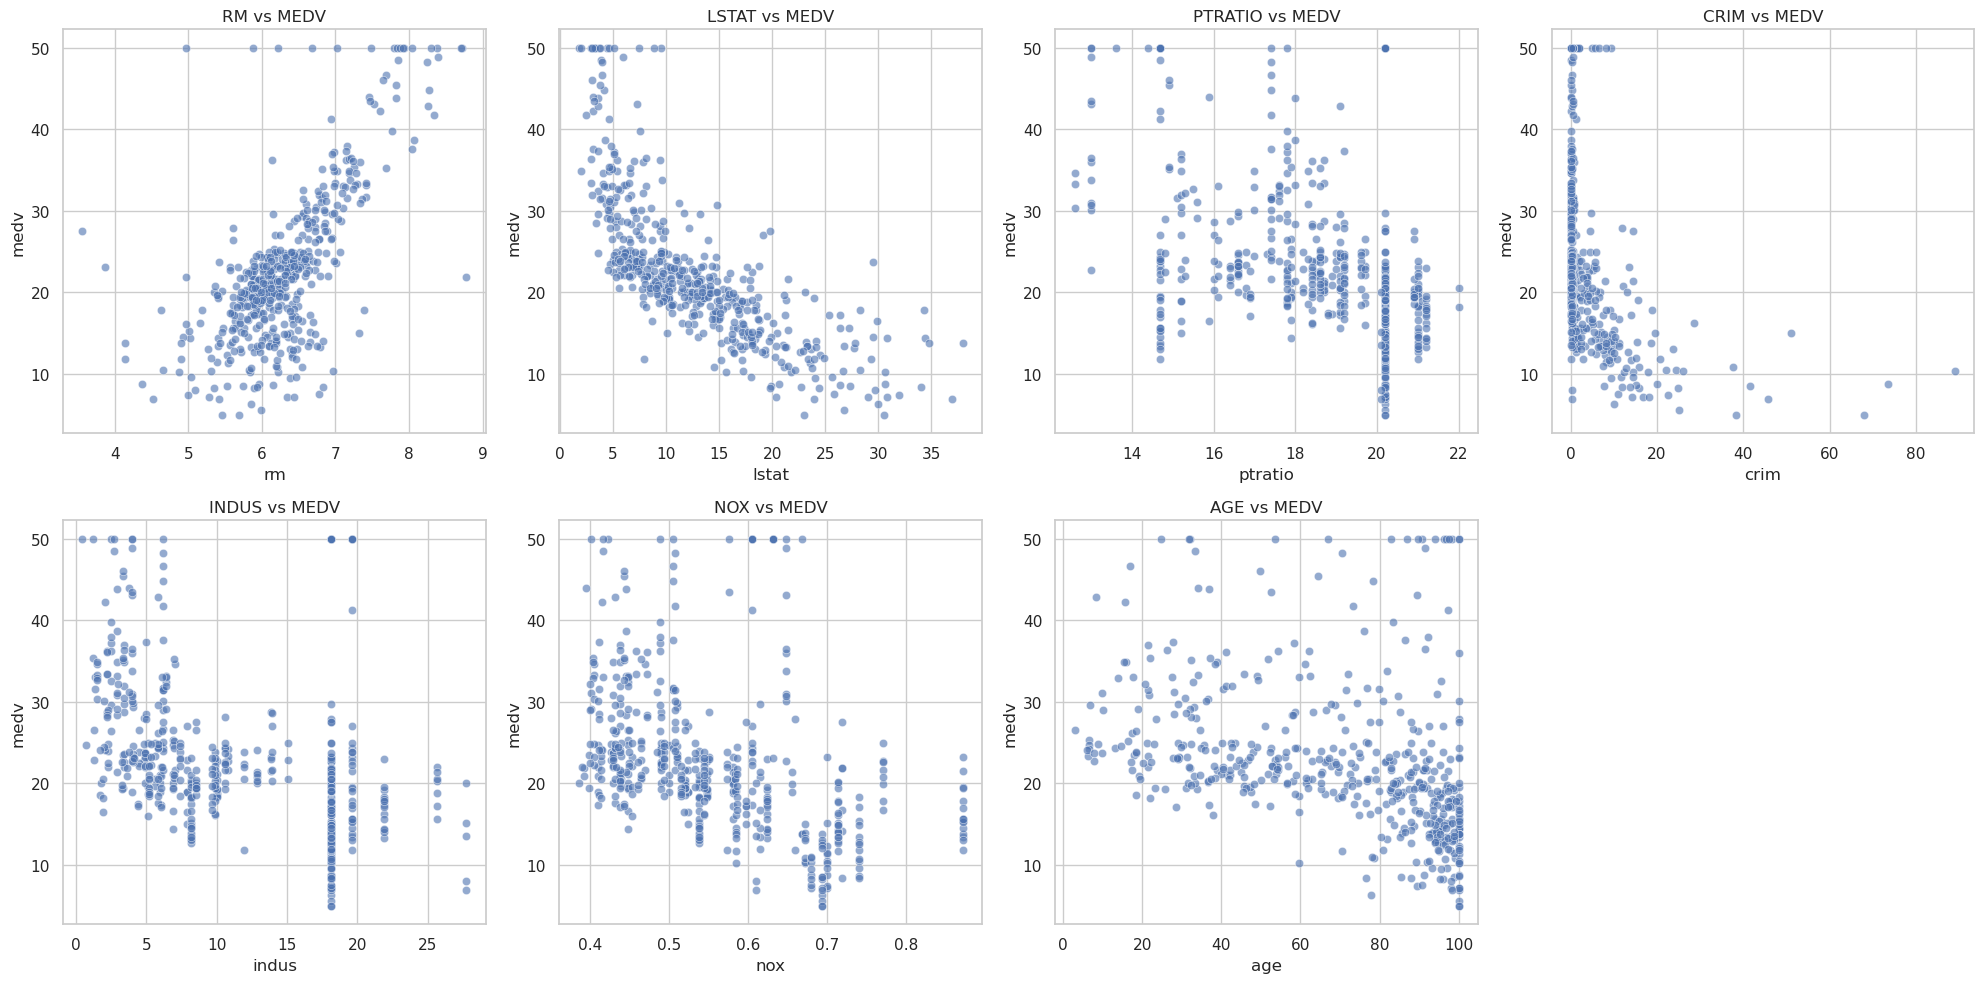

Correlation Heatmap (Target-Focused)
--------------------------------------------------


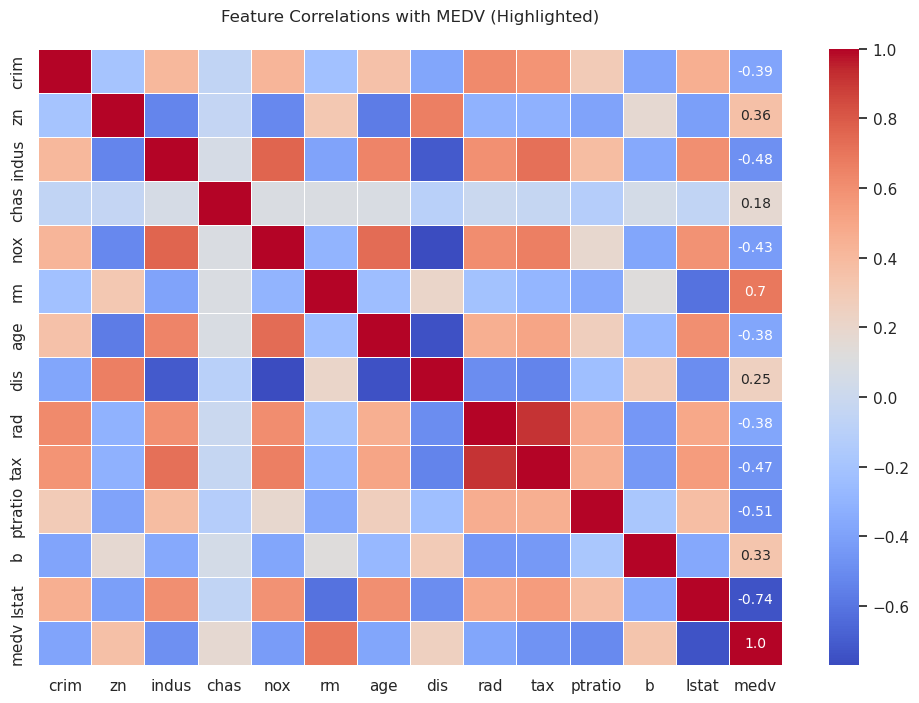

--------------------------------------------------
Pair Plot of Top Features


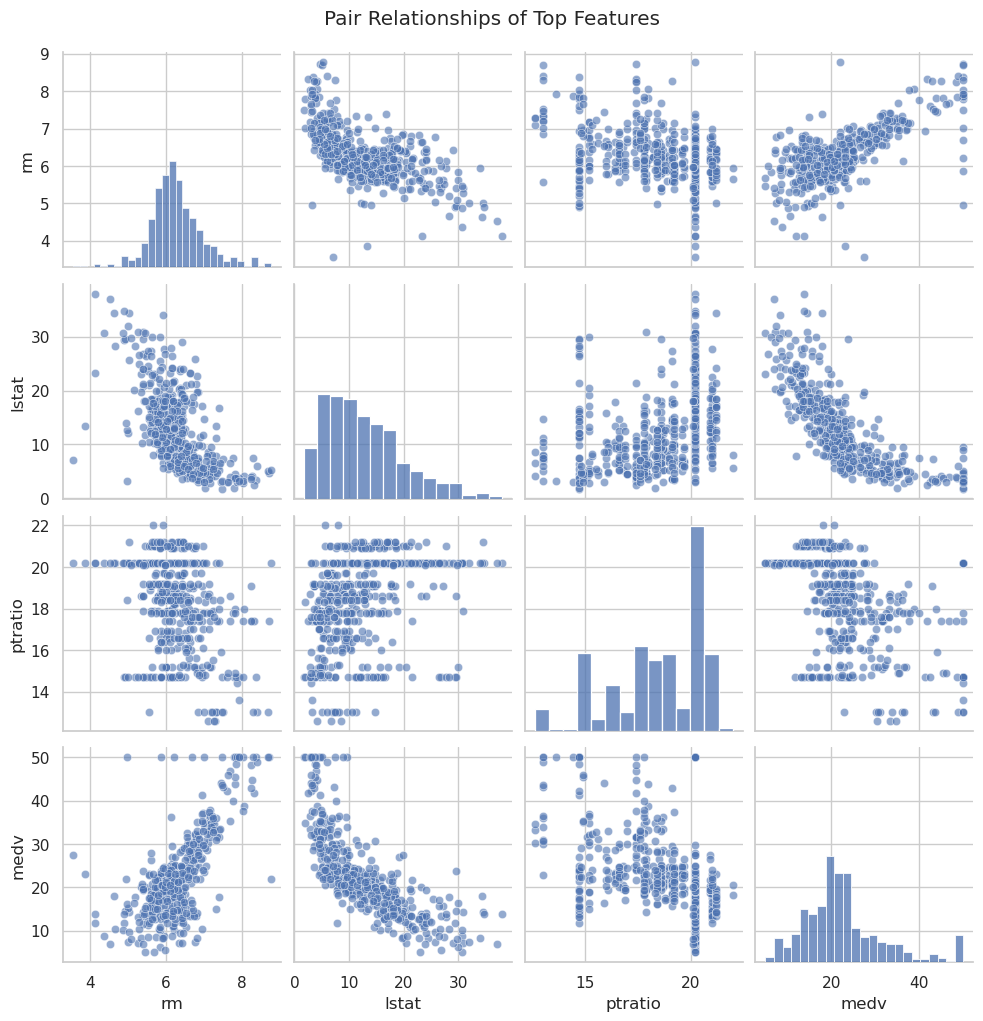

Categorical Feature Analysis (CHAS)


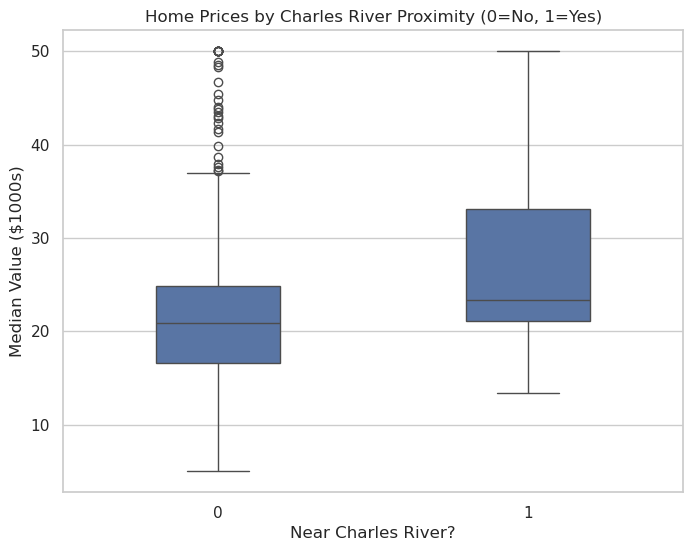

Advanced: Regression Plots


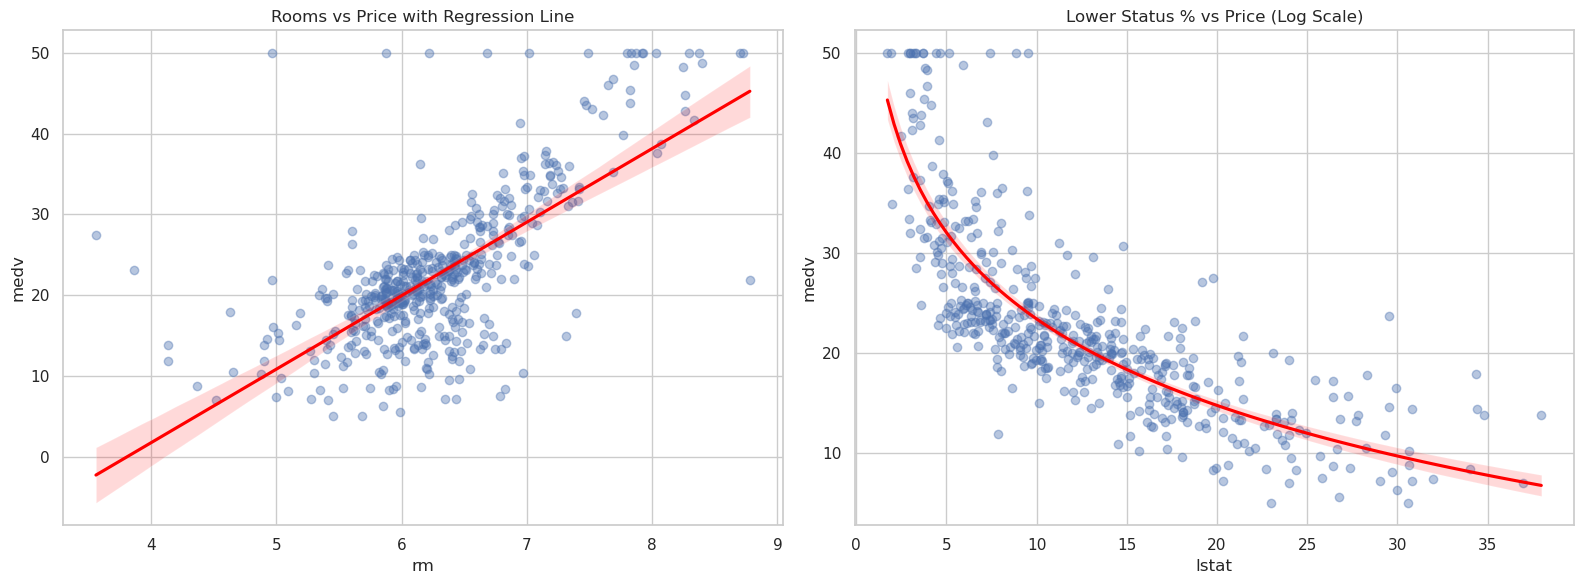

Outlier Detection


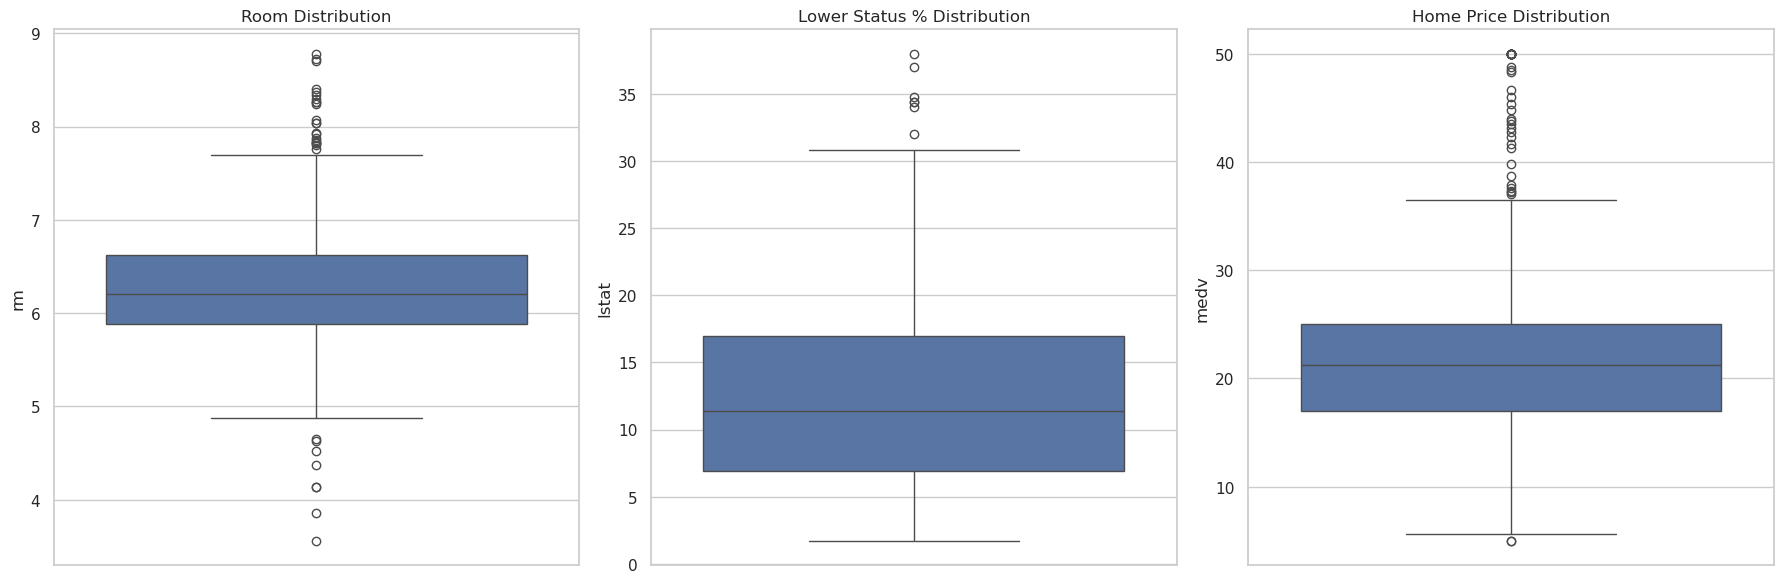

Identify missing values and outliers.
Missing Values per Column:
Series([], dtype: int64)


In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Load the dataset
df = pd.read_csv('../data/boston_housing.csv')

# Explore the data structure, types, and summary statistics.
print("="*50)
print("DATA STRUCTURE OVERVIEW")
print("="*50)
print(f"• Rows: {df.shape[0]} | Columns: {df.shape[1]}\n")


# Print column names and types
print("COLUMNS:")
print("-"*50)
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:<8} → {str(dtype):<10} | Unique values: {df[col].nunique():>3}")


# Print memory usage
print("\n" + "="*50)
print(f"Memory usage: {df.memory_usage(deep=True).sum()/1024:.2f} KB")
print("="*50)


# Visualize relationships between features and the target variable.

# Key Feature vs Target Scatter Plots

# Set style
sns.set(style="whitegrid")

# Select key features for visualization
features = ['rm', 'lstat', 'ptratio', 'crim', 'indus', 'nox', 'age']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.delaxes(axes[1,3])  # Remove empty subplot

# Plot each feature against medv

print("Key Feature vs Target Scatter Plots")
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.scatterplot(ax=axes[row,col], x=feature, y='medv', data=df, alpha=0.6)
    axes[row,col].set_title(f'{feature.upper()} vs MEDV', fontsize=12)
    
plt.tight_layout()
plt.show()

# Correlation Heatmap (Target-Focused)
print("="*50)
print("Correlation Heatmap (Target-Focused)")
print("="*50)

print("-"*50)
plt.figure(figsize=(12, 8))

# Calculate correlations
corr = df.corr()

# Create annotation matrix
annot = corr.round(2).astype(str)  # Convert all values to strings first
mask = corr.columns != 'medv'
annot.loc[:, mask] = ""  # Now safely replace non-MEDV columns with empty strings

# Plot
sns.heatmap(corr, 
            annot=annot, 
            cmap='coolwarm', 
            fmt='',          # Empty fmt since we pre-formatted
            linewidths=0.5,
            annot_kws={"size": 10})
plt.title("Feature Correlations with MEDV (Highlighted)", pad=20)
plt.show()
print("-"*50)





print("="*50)
print("Pair Plot of Top Features")
print("="*50)

top_features = ['rm', 'lstat', 'ptratio', 'medv']
sns.pairplot(df[top_features], height=2.5, plot_kws={'alpha':0.6})
plt.suptitle("Pair Relationships of Top Features", y=1.02)
plt.show()


print("="*50)
print("Categorical Feature Analysis (CHAS)")
print("="*50)
plt.figure(figsize=(8, 6))
sns.boxplot(x='chas', y='medv', data=df, width=0.4)
plt.title("Home Prices by Charles River Proximity (0=No, 1=Yes)")
plt.xlabel("Near Charles River?")
plt.ylabel("Median Value ($1000s)")
plt.show()


print("="*50)
print("Advanced: Regression Plots")
print("="*50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# RM with polynomial trend
sns.regplot(ax=ax1, x='rm', y='medv', data=df, 
            scatter_kws={'alpha':0.4},
            line_kws={'color':'red'})
ax1.set_title("Rooms vs Price with Regression Line")

# LSTAT with logarithmic trend
sns.regplot(ax=ax2, x='lstat', y='medv', data=df, 
            scatter_kws={'alpha':0.4},
            line_kws={'color':'red'},
            logx=True)
ax2.set_title("Lower Status % vs Price (Log Scale)")

plt.tight_layout()
plt.show()




print("="*50)
print("Outlier Detection")
print("="*50)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], y='rm', data=df)
axes[0].set_title("Room Distribution")

sns.boxplot(ax=axes[1], y='lstat', data=df)
axes[1].set_title("Lower Status % Distribution")

sns.boxplot(ax=axes[2], y='medv', data=df)
axes[2].set_title("Home Price Distribution")

plt.tight_layout()
plt.show()


print("="*50)
print("Identify missing values and outliers.")
print("="*50)

# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values per Column:")
print(missing_values[missing_values > 0])  # show columns with missing values



Advanced Missing Value Visualization


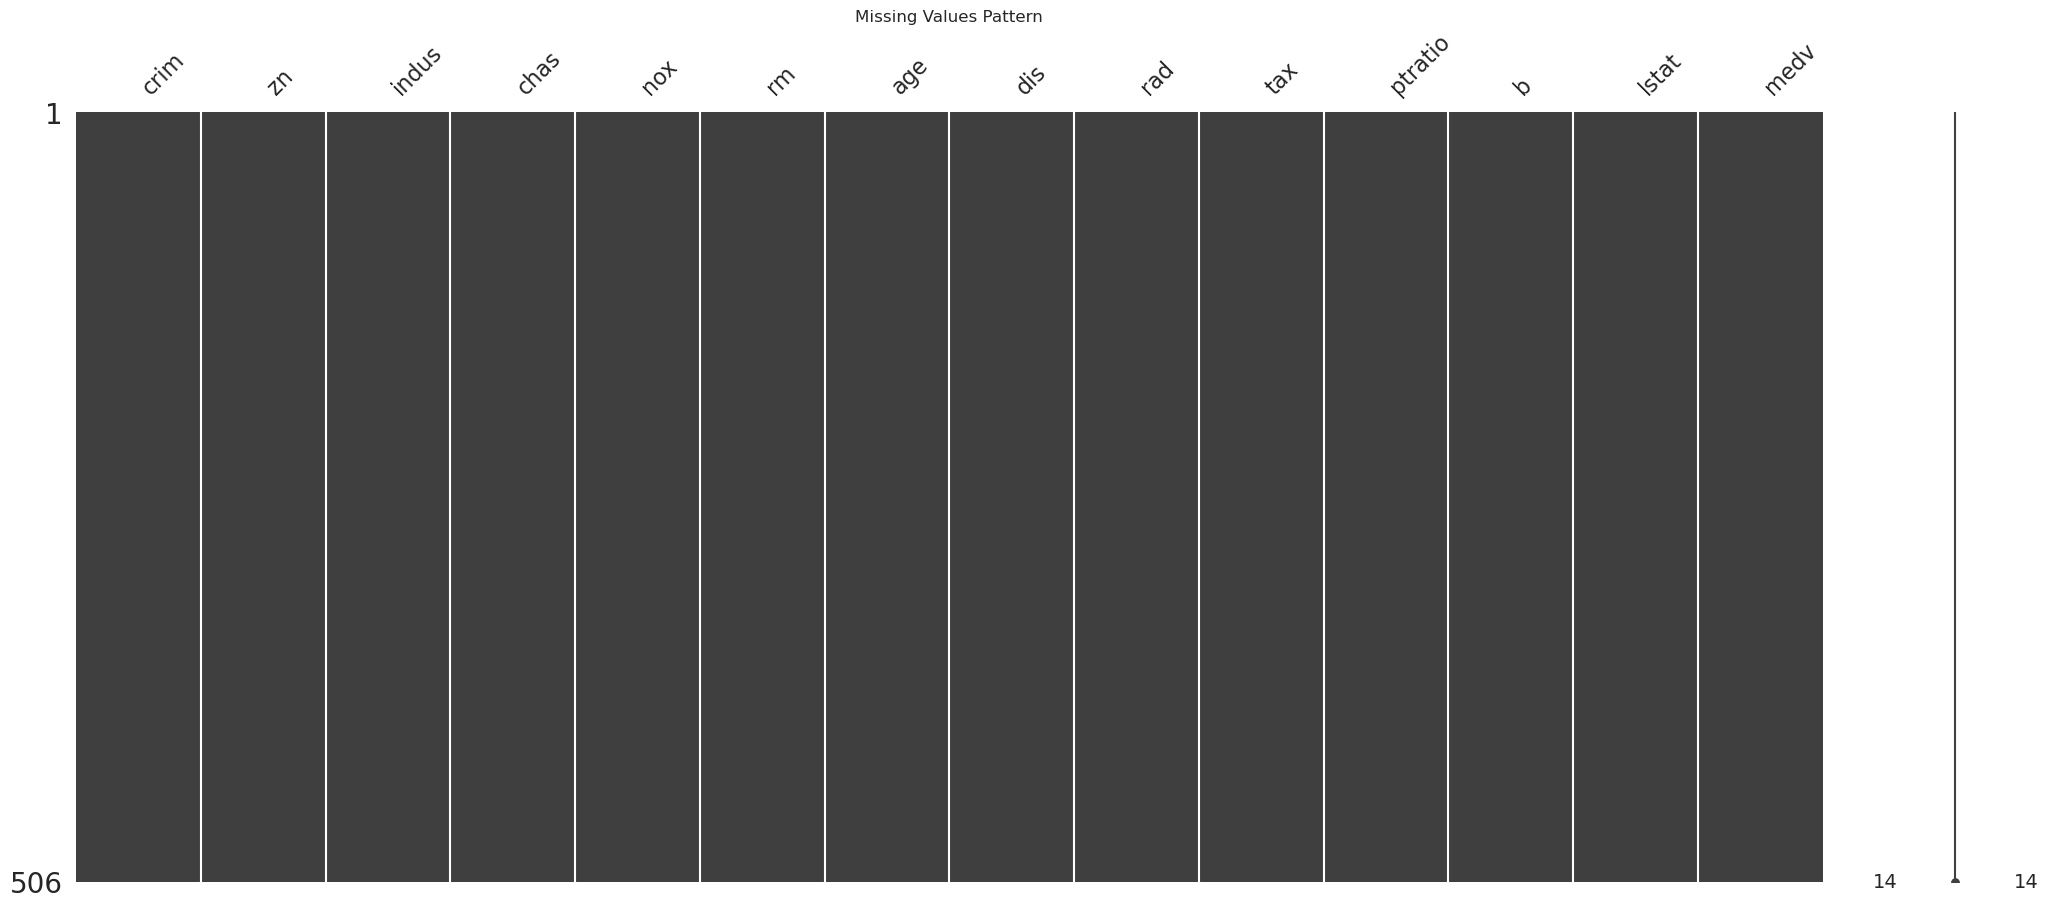

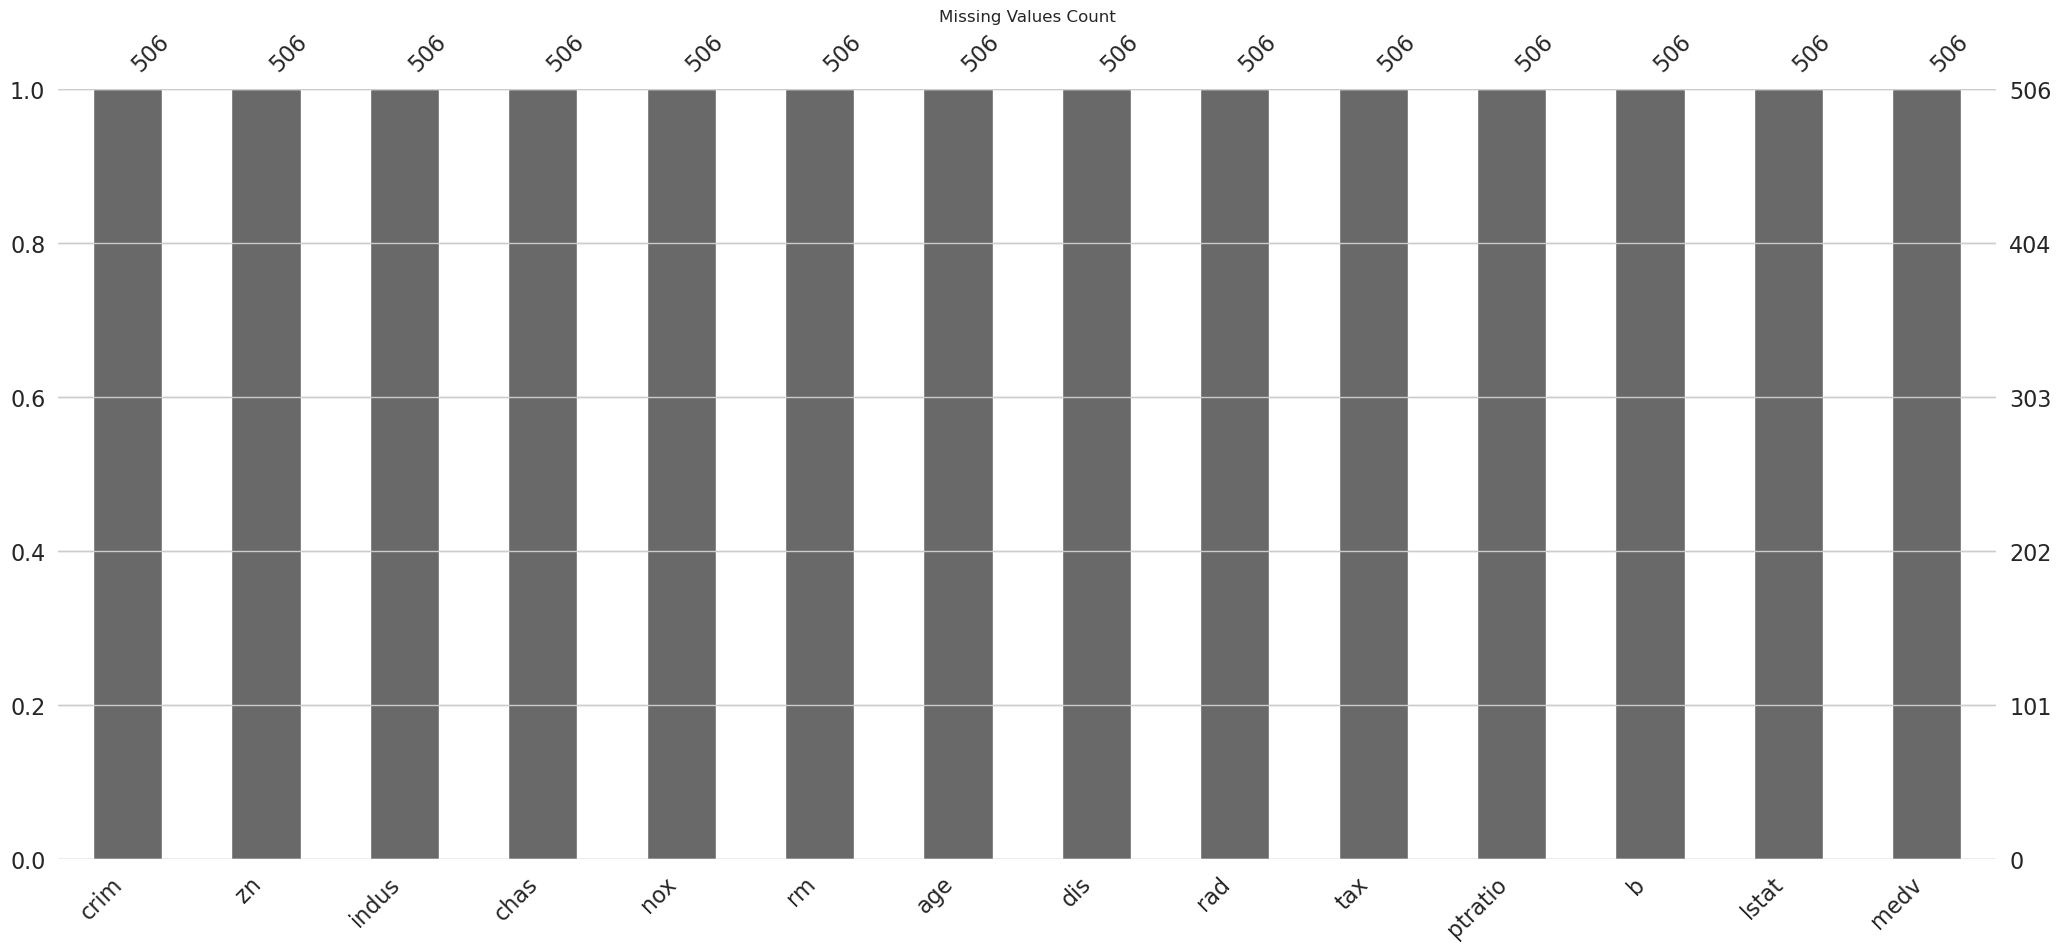

Identify missing values and outliers.


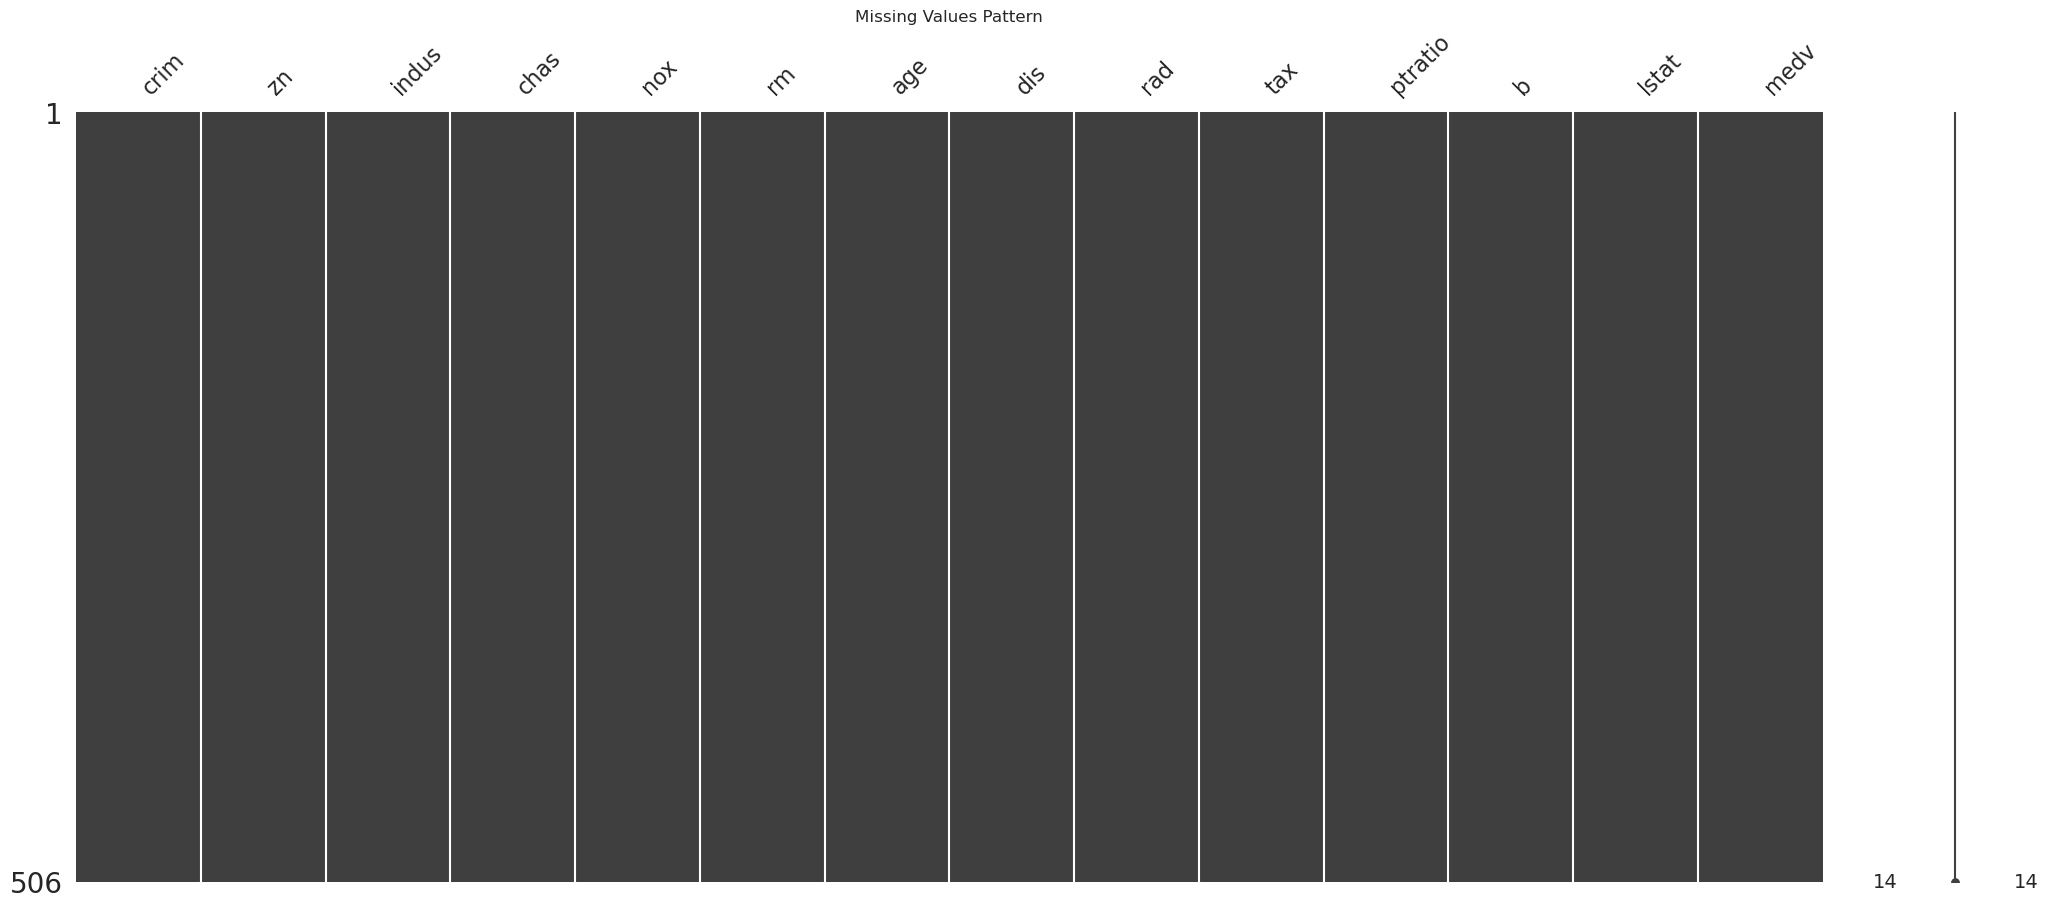

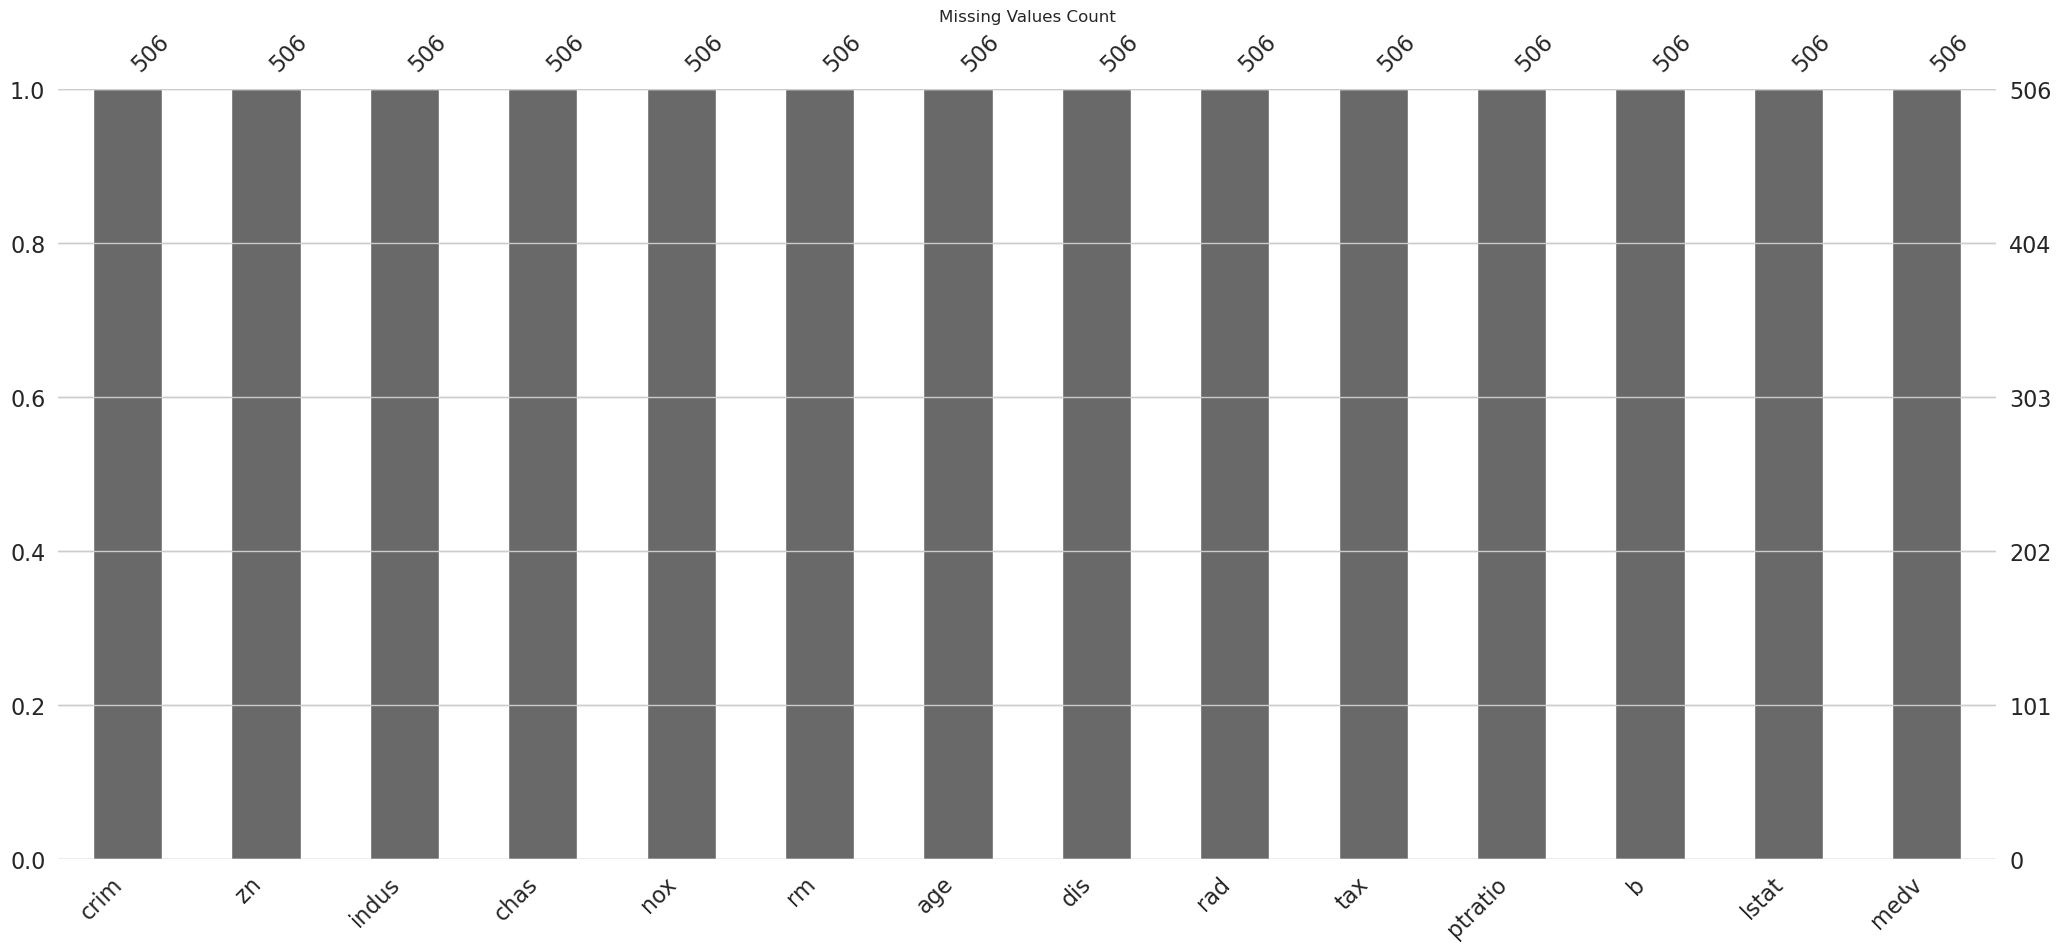

In [36]:

print("="*50)
print("Advanced Missing Value Visualization")
print("="*50)
import missingno as msno

# Matrix view
msno.matrix(df)
plt.title("Missing Values Pattern")
plt.show()

# Bar chart
msno.bar(df)
plt.title("Missing Values Count")
plt.show()


print("="*50)
print("Identify missing values and outliers.")
print("="*50)

import missingno as msno

# Matrix view
msno.matrix(df)
plt.title("Missing Values Pattern")
plt.show()

# Bar chart
msno.bar(df)
plt.title("Missing Values Count")
plt.show()




In [ ]:
print("="*50)
print("Outlier Detection")
print("="*50)

print("~"*50)
print("Statistical Outlier Detection")
print("~"*50)

# Calculate Z-scores for numerical columns
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
outliers = (z_scores > 3).sum(axis=0)

print("\nPotential Outliers (Z-score > 3):")
print(outliers)

Outlier Detection
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Outlier Detection
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Potential Outliers (Z-score > 3):
crim        8
zn         14
indus       0
chas       35
nox         0
rm          8
age         0
dis         5
rad         0
tax         0
ptratio     0
b          25
lstat       5
medv        0
dtype: int64


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Visual Outlier Detection (Box Plots)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


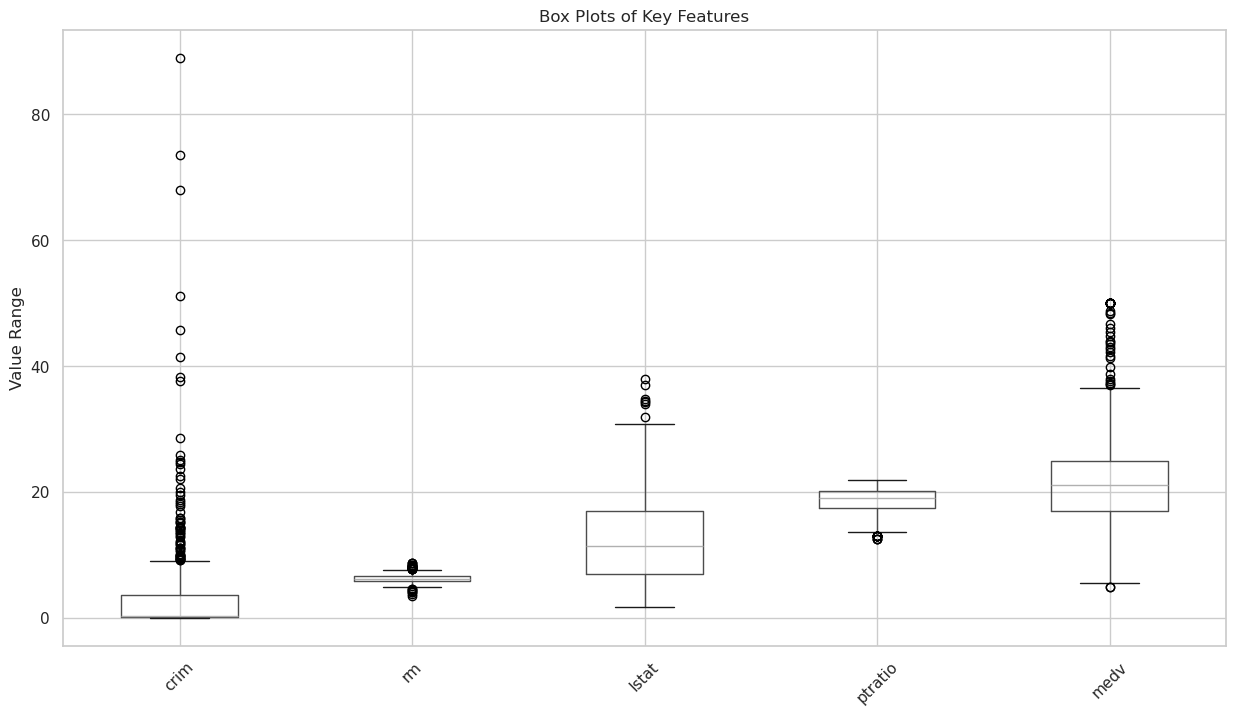

In [39]:
print("~"*50)
print("Visual Outlier Detection (Box Plots)")
print("~"*50)


features = ['crim', 'rm', 'lstat', 'ptratio', 'medv']

plt.figure(figsize=(15, 8))
df[features].boxplot()
plt.title("Box Plots of Key Features")
plt.xticks(rotation=45)
plt.ylabel("Value Range")
plt.show()


In [40]:
print("~"*50)
print(" IQR Method for Specific Features")
print("~"*50)

def detect_outliers_iqr(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Check outliers in crime rate
crim_outliers = detect_outliers_iqr('crim')
print(f"\nExtreme crime rate outliers ({len(crim_outliers)} records):")
print(crim_outliers[['crim', 'medv']].sort_values('crim', ascending=False).head())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 IQR Method for Specific Features
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Extreme crime rate outliers (66 records):
        crim  medv
380  88.9762  10.4
418  73.5341   8.8
405  67.9208   5.0
410  51.1358  15.0
414  45.7461   7.0


In [44]:
print("="*50)

print(" IQR Method for Specific Features")

print("="*50)
print("~"*50)
print("For Missing Values (if any found):")
print("~"*50)

# Option 1: Drop missing values
df_clean = df.dropna()

# Option 2: Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)





 IQR Method for Specific Features
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Missing Values (if any found):
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [45]:
print("~"*50)
print("For Outliers:")
print("~"*50)
# Option 1: Capping
df['crim'] = df['crim'].clip(upper=df['crim'].quantile(0.99))

# Option 2: Log transform for skewed features
df['log_crim'] = np.log1p(df['crim'])

# Option 3: Create outlier flags
df['high_crime_flag'] = (df['crim'] > df['crim'].quantile(0.95)).astype(int)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Outliers:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
